<a href="https://colab.research.google.com/github/Rocknroll-nerd/statistic/blob/main/TreesTask%2C%20XGB%2C%20Catboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn import ensemble, model_selection, metrics 

import numpy as np
import pandas as pd
import xgboost as xgb
from matplotlib import pyplot as plt
%matplotlib inline

## Строим модели, основанные на деревьях:  смотрим random forest и xgboost 

Задача на kaggle: https://www.kaggle.com/c/bioresponse

Данные: https://www.kaggle.com/c/bioresponse/data

По данным характеристикам молекулы требуется определить, будет ли дан биологический ответ (biological response).

Признаки нормализаваны.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/My\ Drive/
from pathlib import Path
CLAS_PATH=Path('datasets')
CLAS_PATH.mkdir(exist_ok=True)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive


In [ ]:
bioresponce = pd.read_csv('datasets/bioresponse.csv', header=0, sep=',')

In [ ]:
#Посмотрите на данные
bioresponce.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,D16,D17,D18,D19,D20,D21,D22,D23,D24,D25,D26,D27,D28,D29,D30,D31,D32,D33,D34,D35,D36,D37,D38,D39,...,D1737,D1738,D1739,D1740,D1741,D1742,D1743,D1744,D1745,D1746,D1747,D1748,D1749,D1750,D1751,D1752,D1753,D1754,D1755,D1756,D1757,D1758,D1759,D1760,D1761,D1762,D1763,D1764,D1765,D1766,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,0.243144,0.187856,0.0000,0.000000,0.069000,0.362012,0.301773,0.597930,0.190813,0.107219,0.070500,0.00717,0.137931,1,0.00,0.496683,0.753131,1,1,0.000000,0.262919,0.077200,0.082700,0.200590,0.00000,0.000000,0.0,0.0,0.162383,0.150153,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,0.106480,0.101382,0.1875,0.193548,0.131001,0.350206,0.187419,0.762669,0.180473,0.329962,0.107681,0.01950,0.206897,0,0.75,0.449869,0.720484,0,0,0.666667,0.099400,0.289240,0.216710,0.100295,0.16958,0.235294,0.0,0.0,0.119104,0.075100,...,0,1,1,0,0,0,1,1,0,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0,1,0,1,1,0,0,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,0.352308,0.193548,0.1250,0.000000,0.068900,0.574628,0.283327,0.510633,0.184480,0.073300,0.061600,0.00566,0.000000,1,0.00,0.486610,0.803577,0,1,0.000000,0.428659,0.032400,0.072400,0.000000,0.03930,0.000000,0.0,0.0,0.076100,0.225229,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,0.208989,0.000000,0.0000,0.000000,0.145947,0.584688,0.325247,0.496745,0.242288,0.087700,0.075300,0.01680,0.000000,1,0.00,0.459122,0.829482,0,1,0.000000,0.435410,0.118562,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.068900,0.000000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,0.125177,0.532258,0.0000,0.000000,0.094900,0.540323,0.116775,0.552982,0.167897,0.116140,0.054200,0.01350,0.103448,1,0.00,0.381883,0.913374,0,1,0.000000,0.305333,0.054100,0.170822,0.000000,0.00000,0.176471,0.0,0.0,0.019900,0.057400,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Разделите данные на примеры и ответы (ответы в первой колонке)
bioresponce_data = bioresponce.iloc[:,1:]
bioresponce_target = bioresponce.Activity.values

## Модель RandomForestClassifier

In [ ]:
#инициализируйте классификатор
rf_classifier_low_depth = ensemble.RandomForestClassifier(n_estimators = 50, max_depth = 2, random_state = 1)

### Зафиксируйте число деревьев (например 50) и постройте кривые обучения (что такое кривые обучения?) для деревьев разной глубины
 
 используйте кросс-валидацию на 3 фолда, воспользуйтесь model_selection.learning_curve

In [ ]:
%%time
train_sizes, train_scores, test_scores = model_selection.learning_curve(rf_classifier_low_depth, bioresponce_data, bioresponce_target, 
                                                                       train_sizes=np.arange(0.1,1., 0.2), 
                                                                       cv=3, scoring='accuracy')

CPU times: user 2.58 s, sys: 66.1 ms, total: 2.65 s
Wall time: 2.66 s


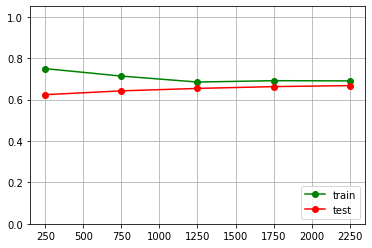

In [ ]:
# Напечатайте скор в зависимости размера выборки для обучающей и тестовой выборки
plt.grid(True)
plt.plot(train_sizes, train_scores.mean(axis = 1), 'g-', marker='o', label='train')
plt.plot(train_sizes, test_scores.mean(axis = 1), 'r-', marker='o', label='test')
plt.ylim((0.0, 1.05))
plt.legend(loc='lower right')

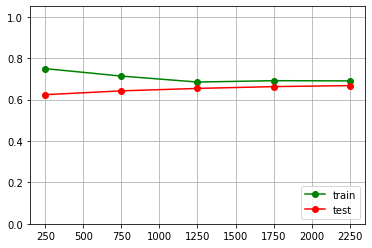

In [ ]:
#Постройте графики
plt.grid(True)
plt.plot(train_sizes, train_scores.mean(axis = 1), 'g-', marker='o', label='train')
plt.plot(train_sizes, test_scores.mean(axis = 1), 'r-', marker='o', label='test')
plt.ylim((0.0, 1.05))
plt.legend(loc='lower right')

In [ ]:
#Увеличьте глубину деревьев, посмотрите как будут меняться кривые?  А потом число деревьев/
rf_classifier_depth = ensemble.RandomForestClassifier(n_estimators = 50, max_depth = 4, random_state = 1)
rf_classifier_depth_middle = ensemble.RandomForestClassifier(n_estimators = 50, max_depth = 6, random_state = 1)
rf_classifier_depth_high = ensemble.RandomForestClassifier(n_estimators = 50, max_depth = 8, random_state = 1)

In [ ]:
%%time
train_sizes, train_scores, test_scores = model_selection.learning_curve(rf_classifier_depth, bioresponce_data, bioresponce_target, 
                                                                       train_sizes=np.arange(0.1,1., 0.2), 
                                                                       cv=3, scoring='accuracy')

CPU times: user 3.33 s, sys: 16.3 ms, total: 3.35 s
Wall time: 3.36 s


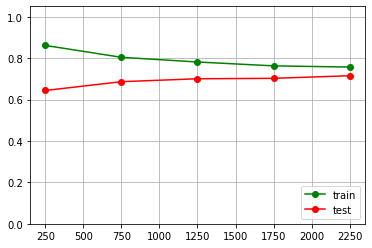

In [ ]:
def plot_tree():
  plt.grid(True)
  plt.plot(train_sizes, train_scores.mean(axis = 1), 'g-', marker='o', label='train')
  plt.plot(train_sizes, test_scores.mean(axis = 1), 'r-', marker='o', label='test')
  plt.ylim((0.0, 1.05))
  plt.legend(loc='lower right')

plot_tree()

CPU times: user 4.18 s, sys: 19.9 ms, total: 4.2 s
Wall time: 4.23 s


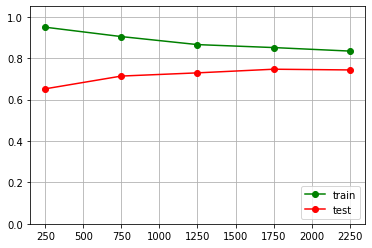

In [ ]:
%%time
train_sizes, train_scores, test_scores = model_selection.learning_curve(rf_classifier_depth_middle, bioresponce_data, bioresponce_target, 
                                                                       train_sizes=np.arange(0.1,1., 0.2), 
                                                                       cv=3, scoring='accuracy')


plot_tree()

CPU times: user 5.11 s, sys: 21.2 ms, total: 5.13 s
Wall time: 5.15 s


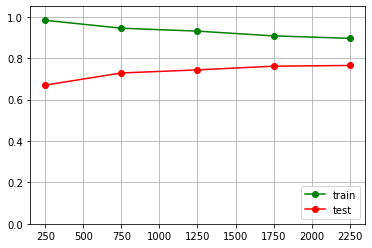

In [ ]:
%%time
train_sizes, train_scores, test_scores = model_selection.learning_curve(rf_classifier_depth_high, bioresponce_data, bioresponce_target, 
                                                                       train_sizes=np.arange(0.1,1., 0.2), 
                                                                       cv=3, scoring='accuracy')
plot_tree()

## Зависимость точности от параметров

Мы с вами смотрели как происходит процесс обучения, это важно для анализа модели. Допустим теперь мы с моделью определились и хотим изучать как параметры влияют на качество, model_selection.cross_val_score вам в помощь

In [ ]:
#Посмотрим как меняется качество от глубины деревьев
n_trees = [1] + list(range(10, 100, 15))
n_trees

[1, 10, 25, 40, 55, 70, 85]

In [ ]:
%%time
scoring = []
for n_tree in n_trees:
    estimator = ensemble.RandomForestClassifier(n_estimators= n_tree, min_samples_split = 5, random_state=1)
    score = model_selection.cross_val_score(estimator, bioresponce_data, bioresponce_target, scoring = 'accuracy', cv = 3)
    scoring.append(score)
scoring = np.asmatrix(scoring)

CPU times: user 14 s, sys: 36.1 ms, total: 14 s
Wall time: 14 s


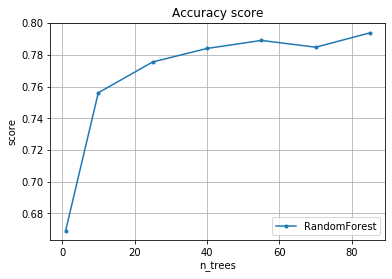

In [ ]:
#Нарисуйте график
plt.plot(n_trees, scoring.mean(axis = 1), marker='.', label='RandomForest')
plt.grid(True)
plt.xlabel('n_trees')
plt.ylabel('score')
plt.title('Accuracy score')
plt.legend(loc='lower right')


In [ ]:
rf = ensemble.RandomForestClassifier(n_estimators=85)
rf.fit(bioresponce_data, bioresponce_target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=85,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Посмотрим заодно на важность признаков

In [ ]:
feat_import = pd.DataFrame(data = rf.feature_importances_, index = bioresponce_data.columns, columns=['Importance']).sort_values(by = 'Importance', ascending = False)

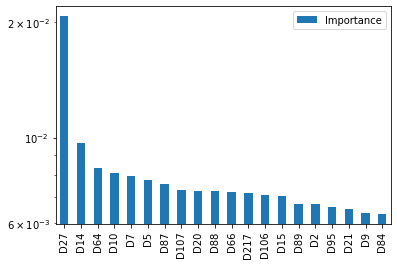

In [ ]:
feat_import.head(20).plot(kind='bar', logy=True)

## Попробуем  xgboost

In [ ]:
%%time
xgb_scoring = []
for n_tree in n_trees:
    estimator = xgb.XGBClassifier(learning_rate=0.1, max_depth=5, n_estimators=n_tree, min_child_weight=3)
    score = model_selection.cross_val_score(estimator, bioresponce_data, bioresponce_target, 
                                             scoring = 'accuracy', cv = 3)  
    xgb_scoring.append(score)
xgb_scoring = np.asmatrix(xgb_scoring)

CPU times: user 2min 2s, sys: 182 ms, total: 2min 2s
Wall time: 2min 3s


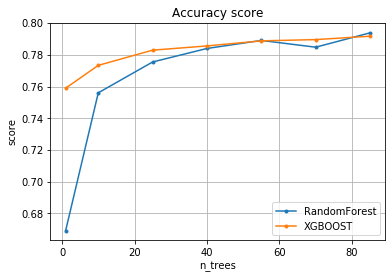

In [ ]:
#Нарисуем графики
plt.plot(n_trees, scoring.mean(axis = 1), marker='.', label='RandomForest')
plt.grid(True)
plt.xlabel('n_trees')
plt.ylabel('score')
plt.plot(n_trees, xgb_scoring.mean(axis = 1), marker='.', label='XGBOOST')
plt.title('Accuracy score')
plt.legend(loc='lower right')

In [ ]:
# Обучите модель xgboost и посмотрите какие признаки важны

In [ ]:
%%time
# обучаем модель, посмотрите сами про модель 
xgb_bio = xgb.XGBClassifier(learning_rate=1, max_depth=5, n_estimators=55, min_child_weight=3, cv=5)
xgb_bio.fit(bioresponce_data, bioresponce_target)

CPU times: user 11.3 s, sys: 43.1 ms, total: 11.4 s
Wall time: 11.4 s



### Посмотрим на важность признаков



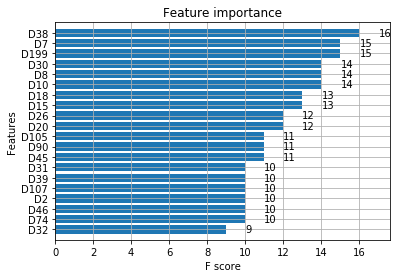

In [ ]:
xgb.plot_importance(xgb_bio, max_num_features=20, height=0.8)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

In [ ]:
label_encoded_y = LabelEncoder().fit_transform(bioresponce_target)
# grid search
model = XGBClassifier()
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.5, 0.7, 1]
param_grid = dict(learning_rate=learning_rate)
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(bioresponce_data, label_encoded_y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))



Best: -0.462736 using {'learning_rate': 0.2}
-0.690150 (0.000038) with: {'learning_rate': 0.0001}
-0.665559 (0.000392) with: {'learning_rate': 0.001}
-0.551550 (0.002866) with: {'learning_rate': 0.01}
-0.471476 (0.005503) with: {'learning_rate': 0.1}
-0.462736 (0.007591) with: {'learning_rate': 0.2}
-0.476875 (0.005968) with: {'learning_rate': 0.3}
-0.515198 (0.002292) with: {'learning_rate': 0.5}
-0.568244 (0.017492) with: {'learning_rate': 0.7}
-0.697023 (0.011624) with: {'learning_rate': 1}


Text(0, 0.5, 'Log Loss')

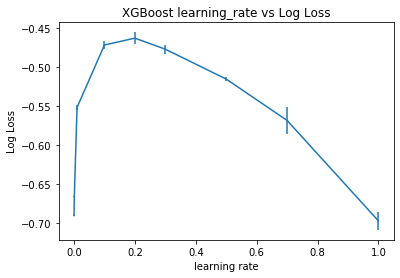

In [ ]:
plt.errorbar(learning_rate, means, yerr=stds)
plt.title("XGBoost learning_rate vs Log Loss")
plt.xlabel('learning rate')
plt.ylabel('Log Loss')

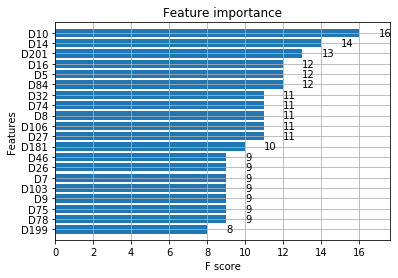

In [ ]:
xgb_bio = xgb.XGBClassifier(learning_rate=0.2, max_depth=5, n_estimators=55, min_child_weight=3, cv=3)
xgb_bio.fit(bioresponce_data, bioresponce_target)
xgb.plot_importance(xgb_bio, max_num_features=20, height=0.8)

## Из популярных библиотек: lightgbm и catboost 
import lightgbm as lgb
import catboost as cb


In [ ]:
import lightgbm as lgb

In [ ]:
label_encoded_y = LabelEncoder().fit_transform(bioresponce_target)

model = lgb.LGBMClassifier()
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.5, 0.7, 1]
param_grid = dict(learning_rate=learning_rate)
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(bioresponce_data, label_encoded_y)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))



Best: -0.454951 using {'learning_rate': 0.1}
-0.686033 (0.000107) with: {'learning_rate': 0.0001}
-0.657551 (0.000501) with: {'learning_rate': 0.001}
-0.520021 (0.006045) with: {'learning_rate': 0.01}
-0.454951 (0.008290) with: {'learning_rate': 0.1}
-0.549005 (0.013499) with: {'learning_rate': 0.2}
-0.684249 (0.033332) with: {'learning_rate': 0.3}
-0.925695 (0.026558) with: {'learning_rate': 0.5}
-1.231816 (0.032293) with: {'learning_rate': 0.7}
-1.429720 (0.013965) with: {'learning_rate': 1}


Text(0, 0.5, 'Log Loss')

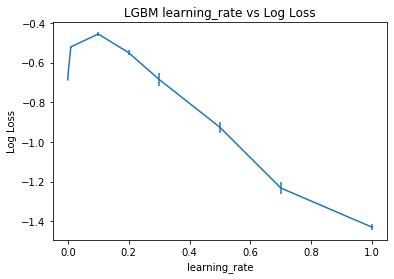

In [ ]:
plt.errorbar(learning_rate, means, yerr=stds)
plt.title("LGBM learning_rate vs Log Loss")
plt.xlabel('learning_rate')
plt.ylabel('Log Loss')

None None None


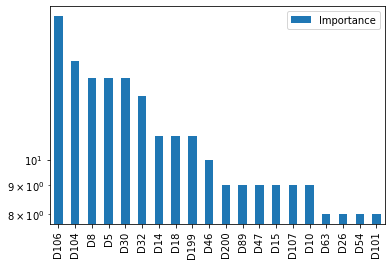

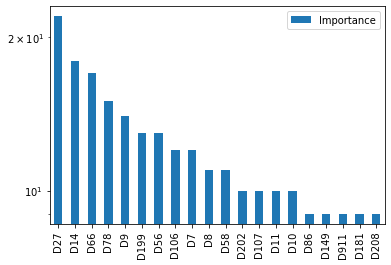

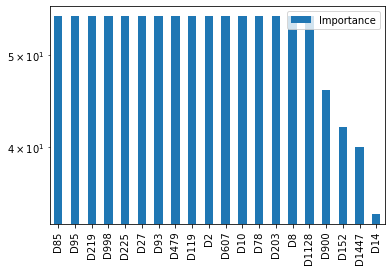

In [ ]:
#изменение признаков в зависимости от learning_rate
def learning_r(x):
  lgb_bio=lgb.LGBMClassifier(learning_rate=x, max_depth=5, n_estimators=55, min_child_weight=3)
  lgb_bio.fit(bioresponce_data, bioresponce_target)
  lgb_fit = pd.DataFrame(data = lgb_bio.feature_importances_, index = bioresponce_data.columns, columns=['Importance']).sort_values(by = 'Importance', ascending = False)
  lgb_fit.head(20).plot(kind='bar', logy=True)

print(learning_r(1), learning_r(0.1), learning_r(0.001))

In [ ]:
!pip install catboost

     |████████████████████████████████| 63.6MB 35kB/s 


In [ ]:
import catboost as cb

In [ ]:
cb_bio = cb.CatBoostClassifier(learning_rate=0.1, max_depth=5, n_estimators= 55, task_type = 'CPU' )
cb_bio.fit(bioresponce_data, bioresponce_target)


0:	learn: 0.6670198	total: 111ms	remaining: 5.99s
1:	learn: 0.6369677	total: 169ms	remaining: 4.48s
2:	learn: 0.6133261	total: 228ms	remaining: 3.95s
3:	learn: 0.5992271	total: 286ms	remaining: 3.65s
4:	learn: 0.5834919	total: 349ms	remaining: 3.49s
5:	learn: 0.5716144	total: 407ms	remaining: 3.32s
6:	learn: 0.5603077	total: 465ms	remaining: 3.19s
7:	learn: 0.5530908	total: 523ms	remaining: 3.07s
8:	learn: 0.5448961	total: 585ms	remaining: 2.99s
9:	learn: 0.5386109	total: 644ms	remaining: 2.9s
10:	learn: 0.5324767	total: 702ms	remaining: 2.81s
11:	learn: 0.5290053	total: 759ms	remaining: 2.72s
12:	learn: 0.5256718	total: 823ms	remaining: 2.66s
13:	learn: 0.5219205	total: 881ms	remaining: 2.58s
14:	learn: 0.5186249	total: 937ms	remaining: 2.5s
15:	learn: 0.5137105	total: 991ms	remaining: 2.42s
16:	learn: 0.5101998	total: 1.05s	remaining: 2.35s
17:	learn: 0.5068083	total: 1.11s	remaining: 2.28s
18:	learn: 0.5040715	total: 1.16s	remaining: 2.2s
19:	learn: 0.5009863	total: 1.22s	remaining:

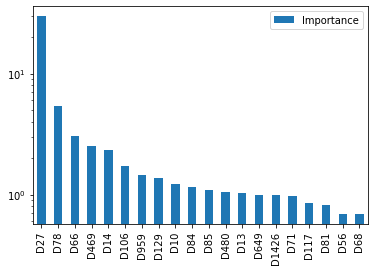

In [ ]:
cb_fit = pd.DataFrame(data = cb_bio.feature_importances_, index = bioresponce_data.columns, columns=['Importance']).sort_values(by = 'Importance', ascending = False)
cb_fit.head(20).plot(kind='bar', logy=True)

In [ ]:
cb.CatBoostClassifier.plot_tree(cb_bio, tree_idx=3)
